In [186]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

## Read example image and mask

### Get the masks for water

In [187]:
masks_for_water = [(35, 35, 35), (7, 7, 7), (38, 38, 38), (20, 20, 20), (55, 55, 55)]

### Study the images

In [188]:
image = cv.imread('dataset/images/train/pier/41048947445.jpg')
mask = cv.imread("dataset/masks/train/pier/41048947445.png")


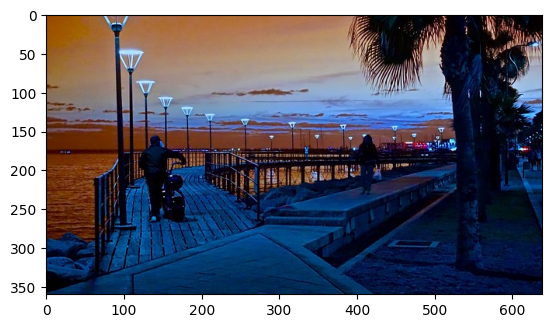

In [189]:
plt.imshow(image)

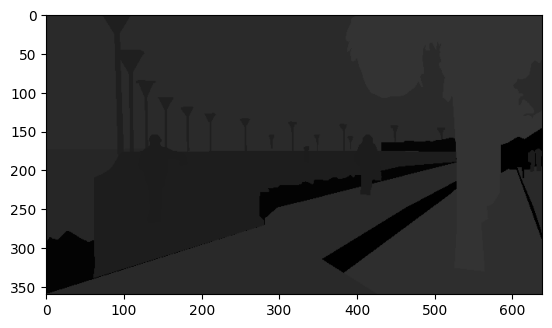

In [190]:
plt.imshow(mask)

In [191]:

image_mask = np.where((mask == masks_for_water[0]) | (mask == masks_for_water[1]) | (
    mask == masks_for_water[2]) | (
    mask == masks_for_water[3]) | (
    mask == masks_for_water[4]), (150, 120, 100), image)


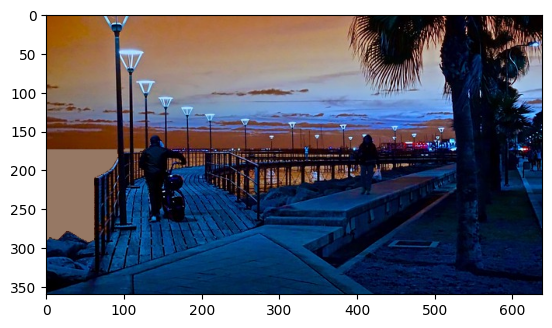

In [192]:
plt.imshow(image_mask)

### Change mask to binary format

In [193]:
mask.shape

(360, 639, 3)

In [194]:
(*mask.shape[:2], 1)

(360, 639, 1)

In [195]:
mask_binary = np.zeros(mask.shape)

In [196]:
mask_binary = np.where((mask == masks_for_water[0]) | (mask == masks_for_water[1]) | (
    mask == masks_for_water[2]) | (
    mask == masks_for_water[3]) | (
    mask == masks_for_water[4]), (1), mask_binary)

mask_binary = mask_binary[:,:,:1]


In [197]:
mask_binary.shape

(360, 639, 1)

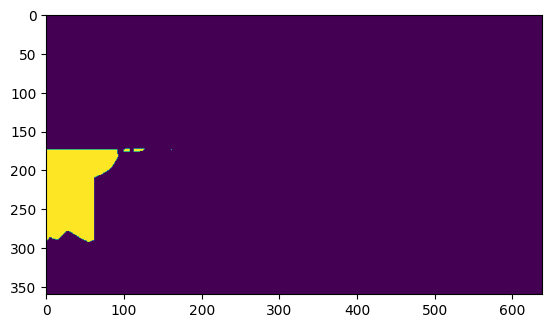

In [198]:
plt.imshow(mask_binary)

## Copy images and mask to directory structure (test, train, validation)

In [199]:
l_paths = ["train", "validation", "test"]
t_paths = ["images", "masks"]

path_mask_train = f"dataset/{t_paths[1]}/{l_paths[0]}"
new_path_mask_train = f"dataset_binary/{l_paths[0]}/{t_paths[1]}"

In [200]:
for i in l_paths:
    for j in t_paths:
        new_path = f"dataset_binary/{i}/{j}"
        isExist = os.path.exists(new_path)
        if not isExist:
            os.makedirs(new_path)
            print("The new directory is created!")

### Change masks to binary and save them

In [201]:
for i in l_paths:
    new_i = i
    if i == "validation": new_i = "val"
    for root, dirs, files in os.walk(f"dataset/{t_paths[1]}/{new_i}"):
        for name in files:
            old_mask = cv.imread(os.path.join(root, name))
            new_mask = np.zeros(old_mask.shape)

            new_mask = np.where(
            (old_mask == masks_for_water[0]) | (
            old_mask == masks_for_water[1]) | (
            old_mask == masks_for_water[2]) | (
            old_mask == masks_for_water[3]) | (
            old_mask == masks_for_water[4]), (1), new_mask)
            new_mask = new_mask[:,:,:1]

            cv.imwrite(f"dataset_binary/{i}/{t_paths[1]}/{name}", new_mask)

            print(os.path.join(root, name))

dataset/masks/train/glaciers/27071606827.png
dataset/masks/train/glaciers/51036458913.png
dataset/masks/train/glaciers/42457997252.png
dataset/masks/train/glaciers/50891599841.png
dataset/masks/train/glaciers/4558912062.png
dataset/masks/train/glaciers/30167220834.png
dataset/masks/train/glaciers/19814896151.png
dataset/masks/train/glaciers/25411661037.png
dataset/masks/train/glaciers/45234592315.png
dataset/masks/train/glaciers/44976064684.png
dataset/masks/train/glaciers/23757014950.png
dataset/masks/train/glaciers/27646513127.png
dataset/masks/train/glaciers/50910872686.png
dataset/masks/train/glaciers/9713198284.png
dataset/masks/train/glaciers/6382003441.png
dataset/masks/train/glaciers/45422583164.png
dataset/masks/train/glaciers/27646529247.png
dataset/masks/train/glaciers/6440636803.png
dataset/masks/train/glaciers/4558306317.png
dataset/masks/train/glaciers/28069811108.png
dataset/masks/train/glaciers/41614572695.png
dataset/masks/train/glaciers/27639054807.png
dataset/masks/t

### Copy images

In [203]:
for i in l_paths:
    new_i = i
    if i == "validation":
        new_i = "val"
    for root, dirs, files in os.walk(f"dataset/{t_paths[0]}/{new_i}"):
        for name in files:
            image = cv.imread(os.path.join(root, name))

            cv.imwrite(f"dataset_binary/{i}/{t_paths[0]}/{name}", image)

            print(os.path.join(root, name))

dataset/images/train/glaciers/27071606827.jpg
dataset/images/train/glaciers/51036458913.jpg
dataset/images/train/glaciers/42457997252.jpg
dataset/images/train/glaciers/50891599841.jpg
dataset/images/train/glaciers/30167220834.jpg
dataset/images/train/glaciers/4558912062.jpg
dataset/images/train/glaciers/19814896151.jpg
dataset/images/train/glaciers/25411661037.jpg
dataset/images/train/glaciers/45234592315.jpg
dataset/images/train/glaciers/50910872686.jpg
dataset/images/train/glaciers/27646513127.jpg
dataset/images/train/glaciers/44976064684.jpg
dataset/images/train/glaciers/23757014950.jpg
dataset/images/train/glaciers/9713198284.jpg
dataset/images/train/glaciers/6382003441.jpg
dataset/images/train/glaciers/45422583164.jpg
dataset/images/train/glaciers/27646529247.jpg
dataset/images/train/glaciers/6440636803.jpg
dataset/images/train/glaciers/28069811108.jpg
dataset/images/train/glaciers/4558306317.jpg
dataset/images/train/glaciers/41614572695.jpg
dataset/images/train/glaciers/301671981